In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

In [4]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15,6

In [25]:
from src import data, viz

In [42]:
import os
import datetime
import itertools

In [74]:
df_cases_de = data.load_epiforecast_cases(country='germany')

In [75]:
df_cases_de

,median,lower_90,upper_90,lower_50,upper_50,confidence
date,,,,,,
2019-12-21,1.0,1,1,1,1,1.00
2019-12-22,0.0,0,0,0,0,1.00
2019-12-23,0.0,0,1,0,0,1.00
2019-12-24,1.0,0,1,1,1,1.00
2019-12-25,0.0,0,1,0,0,1.00
...,...,...,...,...,...,...
2020-05-24,418.0,376,453,400,430,0.93
2020-05-25,415.0,376,451,397,426,0.91
2020-05-26,408.0,371,451,388,421,0.89


In [71]:
df_rt_de = data.load_epiforecast_rt(country='germany')

In [72]:
df_rt_de

,type,median,lower_90,upper_90,lower_50,upper_50,prob_control
date,,,,,,,
2020-02-28,nowcast,1.9,1.6,2.3,1.7,2.0,0.00
2020-02-29,nowcast,1.9,1.6,2.3,1.7,2.0,0.00
2020-03-01,nowcast,1.9,1.6,2.2,1.7,1.9,0.00
2020-03-02,nowcast,1.8,1.5,2.2,1.7,1.9,0.00
2020-03-03,nowcast,1.8,1.5,2.1,1.7,1.9,0.00
...,...,...,...,...,...,...,...
2020-06-07,forecast,1.0,0.8,1.1,0.9,1.0,0.67
2020-06-08,forecast,1.0,0.8,1.1,0.9,1.0,0.66
2020-06-09,forecast,1.0,0.8,1.1,0.9,1.0,0.65


In [35]:
start_date=datetime.date(2020, 2, 15)
country='germany'

In [76]:
df_reported = data.load_covid19(country)

In [77]:
df_rki = data.load_rki_nowcasting()


Text(0, 0.5, 'daily numbers')

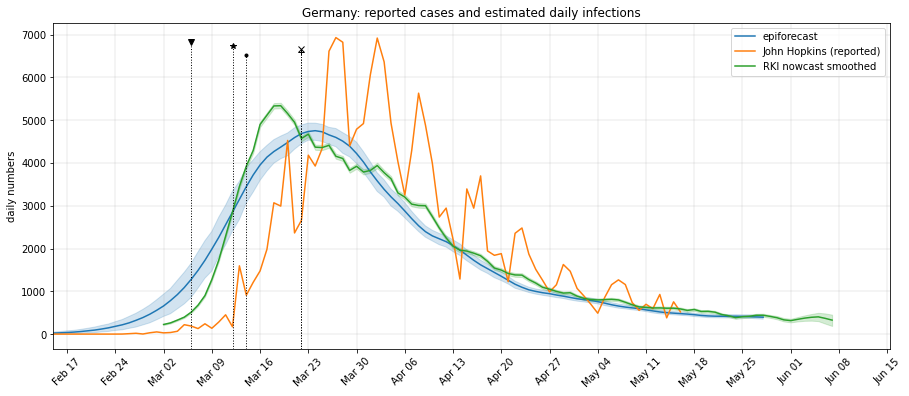

In [78]:
fig, ax = plt.subplots()
palette = itertools.cycle(sns.color_palette())

pal=[next(palette)]
sns.lineplot(
    data=df_cases_de[['median']].rename(
        axis='columns',
        mapper={'median':'epiforecast'}
    ),
    palette=pal,
    ax=ax
)
ax.fill_between(
    df_cases_de.index.values,
    df_cases_de.lower_90, 
    df_cases_de.upper_90,
    color=pal[0],
    alpha=0.2
)

pal=[next(palette)]
sns.lineplot(
    data=df_reported[['Confirmed']].diff().rename(
        axis='columns',
        mapper={'Confirmed':'John Hopkins (reported)'}
    ),
    palette=pal,
    ax=ax
)

pal=[next(palette)]
sns.lineplot(
    data=df_rki[['number_of_new_cases_point_estimate']].rename(
        axis='columns',
        mapper={
            'number_of_new_cases_point_estimate':'RKI nowcast smoothed',
        }

    ),
    palette=pal,
    ax=ax
)

ax.fill_between(
    df_rki.index.values,
    df_rki.number_of_new_cases_lower_CI_95, 
    df_rki.number_of_new_cases_upper_CI_95,
    color=pal[0],
    alpha=0.2
)


viz.format_xaxis_dates(ax)
ax.set_xlim(left=start_date)
ax.grid(color='#999999', linewidth=0.2)
ax.set_title('Germany: reported cases and estimated daily infections')
viz.annotate_interventions(ax,country,legend=False)
ax.set_xlabel('')
ax.set_ylabel('daily numbers')


Text(0.5, 1.0, 'Germany: R(t)')

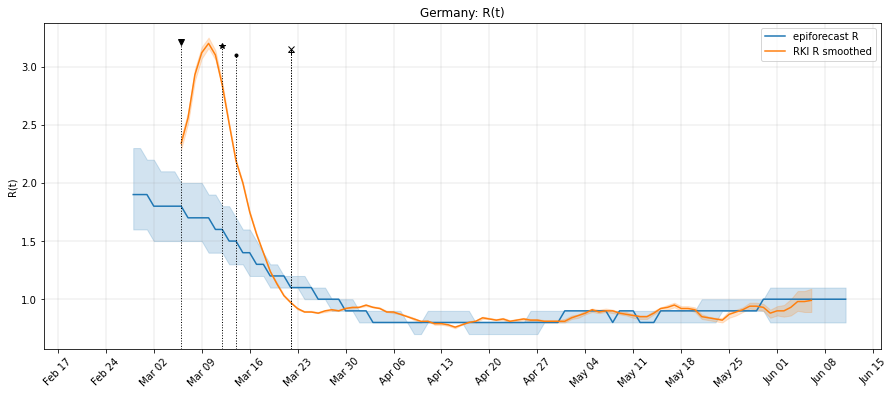

In [79]:
fig, ax = plt.subplots()
df = data.load_rki_nowcasting()
palette = itertools.cycle(sns.color_palette())

pal=[next(palette)]
sns.lineplot(
    data=df_rt_de[['median']].rename(
        axis='columns',
        mapper={'median':'epiforecast R'}
    ),
    palette=pal,
    ax=ax
)
ax.fill_between(
    df_rt_de.index.values,
    df_rt_de.lower_90, 
    df_rt_de.upper_90,
    color=pal[0],
    alpha=0.2
)


pal=[next(palette)]
sns.lineplot(
    data=df[['R_7_day_point_estimate']].rename(
        axis='columns',
        mapper={
            'R_7_day_point_estimate':'RKI R smoothed',
        }
    ),
    palette=pal,    
    ax=ax
)

ax.fill_between(
    df.index.values,
    df.R_7_day_lower_CI_95,
    df.R_7_day_upper_CI_95,
    color=pal[0],
    alpha=0.2
)
ax.set_xlim(left=start_date)
ax.grid(color='#999999', linewidth=0.2)

viz.format_xaxis_dates(ax)
ax.set_xlabel('')
ax.set_ylabel('R(t)')
viz.annotate_interventions(ax,country,legend=False)
ax.set_title('Germany: R(t)')


